## get timestamps video if possible

## pafy --bot issue

In [12]:
!pip install pafy

In [14]:
!pip install youtube_dl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 28.1 MB/s eta 0:00:00a 0:00:01


In [15]:
url="https://www.youtube.com/watch?v=W2HVdB4Jbjs"
# importing pafy
import pafy 
  
# url of video 
  
# getting video
video = pafy.new(url) 

# getting description of the video
value = video.description

# printing the value
print(value)

ERROR: Sign in to confirm you’re not a bot
This helps protect our community. Learn more


OSError: ERROR: Sign in to confirm you’re not a bot
This helps protect our community. Learn more

In [18]:
!pip install --upgrade pytube


In [16]:
!pip install pytube


## attemps two yt-dlp

### get sections

In [2]:
!ffmpeg -i "/kaggle/input/videosection/output_video_only2.mp4" -c:v libx264 -crf 23 -preset veryfast output.mp4


ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [13]:
rm -i kaggle/working/*

rm: cannot remove 'kaggle/working/*': No such file or directory


In [17]:
def get_histogram(image):
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    hist = cv2.calcHist([hsv], [0, 1], None, [50, 60], [0, 180, 0, 256])
    cv2.normalize(hist, hist)
    return hist



In [56]:
import cv2

import numpy as np

video_path = "/kaggle/input/videosection3/LangChain Explained In 15 Minutes - A MUST Learn For Python Programmers.mp4"  # Change this to your actual path
capture = cv2.VideoCapture(video_path)
timestamps=[]

if not capture.isOpened():
    print("Error opening video file.")
    exit()

fps = capture.get(cv2.CAP_PROP_FPS)
frame_count = int(capture.get(cv2.CAP_PROP_FRAME_COUNT))
duration = frame_count / fps
#initialise last frame with the first frame in the vid
_, frame0 = capture.read()
last_frame=frame0
last_check=0
timestamps.append((last_frame,last_check))
interval = 5  # seconds

for sec in range(0, int(duration), interval):
    frame_number = int(sec * fps)
    capture.set(cv2.CAP_PROP_POS_FRAMES, frame_number)
    
    success, frame = capture.read()
    diff=cv2.compareHist(get_histogram(last_frame), get_histogram(frame), cv2.HISTCMP_BHATTACHARYYA) # we got a big change in frame
  
    if diff >0.6:  #the sec-checklast bigthan 10
        timestamps.append(frame)
        print(type(frame))
        print(f"bingo {diff}")
    #if success:
         
      # print(f"the histo of last frameas {sec} { np.mean(get_histogram(last_frame))}   -- the histo of framae at {sec}  is { np.mean(get_histogram(frame))}")
    last_frame=frame
    last_check=sec
    
    if not success:
        print(f"Failed to read frame at {sec} seconds.")
        continue
   
    #process_frame(frame, sec)
    cv2.imwrite(f"output_path{sec}.png", frame)
   
    #f=process_frame(frame,sec)
    #get them timestamps
    #diff = cv2.compareHist(hist1, hist2, cv2.HISTCMP_BHATTACHARYYA)




capture.release()


<class 'numpy.ndarray'>
bingo 0.8880282823453951
<class 'numpy.ndarray'>
bingo 0.8121243319446757
<class 'numpy.ndarray'>
bingo 0.9605394588850532
<class 'numpy.ndarray'>
bingo 0.8497745171248489
<class 'numpy.ndarray'>
bingo 0.6159147697246898
<class 'numpy.ndarray'>
bingo 0.9045330774968835
<class 'numpy.ndarray'>
bingo 0.6703399890137776
<class 'numpy.ndarray'>
bingo 0.7278414215657011
<class 'numpy.ndarray'>
bingo 0.9179101049445703
<class 'numpy.ndarray'>
bingo 0.8591297666690957
<class 'numpy.ndarray'>
bingo 0.8951202824709745
<class 'numpy.ndarray'>
bingo 0.8904106824991787
<class 'numpy.ndarray'>
bingo 0.9501121215427496
<class 'numpy.ndarray'>
bingo 0.6234011419709492
<class 'numpy.ndarray'>
bingo 0.6043797721190535
<class 'numpy.ndarray'>
bingo 0.94356589023674
<class 'numpy.ndarray'>
bingo 0.8540719735103748
<class 'numpy.ndarray'>
bingo 0.8459642692492626
<class 'numpy.ndarray'>
bingo 0.8982989948552537


In [53]:
import matplotlib.pyplot as plt

def show_frames_grid_matplotlib(frames, grid_shape=(2, 3), frame_size=(320, 240)):
    rows, cols = grid_shape
    fig, axes = plt.subplots(rows, cols, figsize=(12, 6))
    for i in range(rows * cols):
        if i >= len(frames):
            break
        img = cv2.resize(frames[i], frame_size)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        axes[i // cols, i % cols].imshow(img)
        axes[i // cols, i % cols].axis('off')
    plt.tight_layout()
    plt.show()


20


error: OpenCV(4.11.0) :-1: error: (-5:Bad argument) in function 'resize'
> Overload resolution failed:
>  - src is not a numerical tuple
>  - Expected Ptr<cv::UMat> for argument 'src'


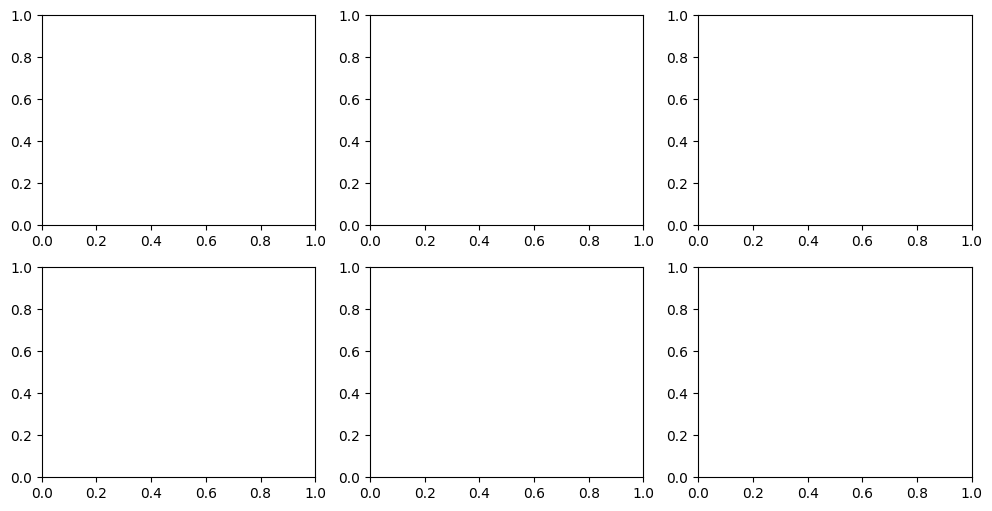

In [55]:
print(len(timestamps))
show_frames_grid_matplotlib(timestamps)
    

In [4]:
def process_frame(frame, timestamp):
    frames=[]
    print(f"Processing frame at {timestamp:.2f} seconds")
    frames.append((frame,timestamp))
    return frame

In [15]:
print(f[0][1])

[192 195 185]


In [26]:
img=cv2.imread("/kaggle/working/output_path0.png")
img1=cv2.imread("/kaggle/working/output_path450.png")

In [30]:

# give historgrams between very diff very diff images
hist1 = get_histogram(img1)
hist2 = get_histogram(img)

# Compare histograms
diff = cv2.compareHist(hist1, hist2, cv2.HISTCMP_BHATTACHARYYA)

print(f"Histogram difference: {diff:.4f}")

Histogram difference: 0.8747


In [31]:
img3=cv2.imread("/kaggle/working/output_path400.png")
hist1 = get_histogram(img1)
hist2 = get_histogram(img3)

# Compare histograms
diff = cv2.compareHist(hist1, hist2, cv2.HISTCMP_BHATTACHARYYA)

print(f"Histogram difference: {diff:.4f}")

Histogram difference: 0.1353
